In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.optimize as fit

In [5]:
temp = pd.read_csv('GlobalLandTemperaturesByState.csv', usecols = ['dt', 'AverageTemperature', 'State'])

In [6]:
temp.head()

,dt,AverageTemperature,State
0,1855-05-01,25.544,Acre
1,1855-06-01,24.228,Acre
2,1855-07-01,24.371,Acre
3,1855-08-01,25.427,Acre
4,1855-09-01,25.675,Acre


In [7]:
temp['dt'] = pd.to_datetime(temp['dt'])
temp = temp[(temp['dt'] >= '2000-01-01') & (temp['State'].isin(['Wyoming', 'Nebraska', 'South Dakota']))]
temp

,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [8]:
temp['State Mean Temp'] = temp.groupby(['State'])['AverageTemperature'].transform('mean')
temp

,dt,AverageTemperature,State,State Mean Temp
350761,2000-01-01,-2.024,Nebraska,10.275570
350762,2000-02-01,1.719,Nebraska,10.275570
350763,2000-03-01,5.687,Nebraska,10.275570
350764,2000-04-01,9.417,Nebraska,10.275570
350765,2000-05-01,16.827,Nebraska,10.275570
...,...,...,...,...
626435,2013-05-01,10.607,Wyoming,6.118782
626436,2013-06-01,16.267,Wyoming,6.118782
626437,2013-07-01,20.222,Wyoming,6.118782
626438,2013-08-01,19.621,Wyoming,6.118782


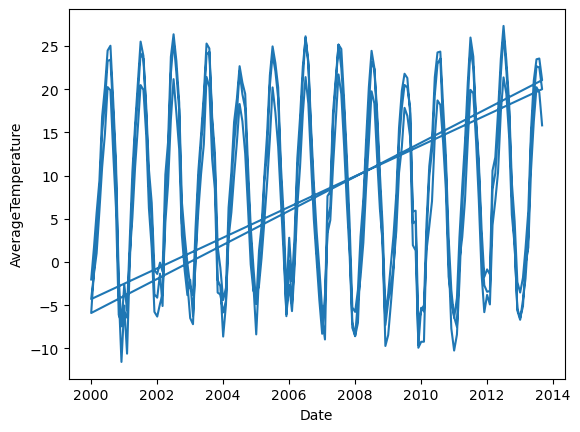

In [9]:
plt.figure()
plt.plot(temp['dt'], temp['AverageTemperature'])
plt.xlabel('Date')
plt.ylabel('AverageTemperature')
plt.show()

In [10]:
temp['dt_ordinal'] = temp['dt'].map(lambda x: x.toordinal())
temp.drop_duplicates(subset='dt_ordinal', keep='first', inplace=False)
temp

,dt,AverageTemperature,State,State Mean Temp,dt_ordinal
350761,2000-01-01,-2.024,Nebraska,10.275570,730120
350762,2000-02-01,1.719,Nebraska,10.275570,730151
350763,2000-03-01,5.687,Nebraska,10.275570,730180
350764,2000-04-01,9.417,Nebraska,10.275570,730211
350765,2000-05-01,16.827,Nebraska,10.275570,730241
...,...,...,...,...,...
626435,2013-05-01,10.607,Wyoming,6.118782,734989
626436,2013-06-01,16.267,Wyoming,6.118782,735020
626437,2013-07-01,20.222,Wyoming,6.118782,735050
626438,2013-08-01,19.621,Wyoming,6.118782,735081


Text(0, 0.5, 'AverageTemperature')

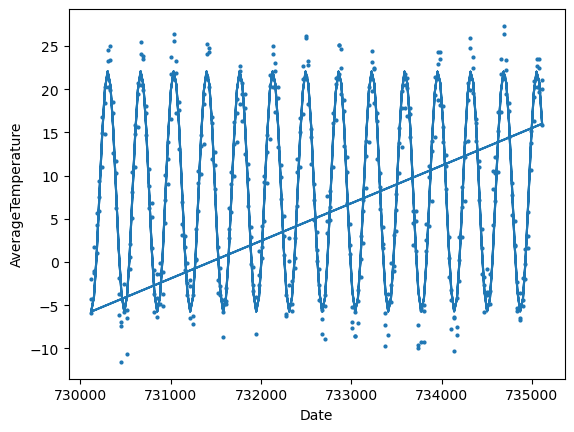

In [11]:
def f(x, A, k, b, c):
    return A * np.sin(k*x + b) + c
p0 = [18, 0.018, 730120, np.mean(temp['AverageTemperature'])]
para, cv_matrix = fit.curve_fit(f, temp['dt_ordinal'], temp['AverageTemperature'], p0)
plt.figure()
plt.scatter(temp['dt_ordinal'], temp['AverageTemperature'], s = 4)
plt.plot(temp['dt_ordinal'], f(temp['dt_ordinal'], para[0], para[1], para[2], para[3]))
plt.xlabel('Date')
plt.ylabel('AverageTemperature')

In [27]:
results = {
    'Parameter': ['A', 'k', 'b', 'c'],
    'Value': (para),
    'Error': [cv_matrix[0][0], cv_matrix[1][1], cv_matrix[2][2], cv_matrix[3][3]]
}
results = pd.DataFrame.from_dict(results)
results

,Parameter,Value,Error
0,A,-13.915463,2.799146e-01
1,k,0.017192,8.293327e-11
2,b,730712.399832,4.451430e+01
3,c,8.170356,1.656948e-02


In [45]:
print(str(round(results['Value'][0], 3)) + 'sin(' + str(round(results['Value'][1], 3)) + 'x + ' + str(round(results['Value'][2], 3)) + ') + ' + str(round(results['Value'][3], 3)))

-13.915sin(0.017x + 730712.4) + 8.17
